# Case study: Shear Wave Elastography (SWE)

## A (very) brief introduction to SWE

Ultrasound shear wave elastography (SWE) has emerged as a promising technique that enables the quantitative estimation of soft tissue stiffness.  
The SWE technique relies on remotely inducing tissue displacement using the acoustic radiation force (ARF), as first proposed by Sarvazyan et al. [Sarvazyan1998].   
The ARF is generated by an ultrasound beam (also called a push beam or push pulse) and is defined in following equation:  

$$
\vec{F} = \frac{2\alpha{}\vec{I}}{c}
$$

where
* $\vec{F}$ - acoustic radiation force,
* $\alpha$ - absorption coefficient, 
* $\vec{I}$ - acoustic intensity, 
* $c$ - speed of sound in the medium. It is usually assumed that in soft tissue $c = 1540 [m/s]$.



--------------------------------------------------------------------------------

## Let's implement above estimators in GPU kernel, use it, and show some SWE images.   

### 'import' section

In [1]:
import cupy as cp
import cupyx.scipy.ndimage
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from IPython.display import HTML
# from gpu_short_course.flow_imaging import (
#     dB,
#     filter_wall_clutter_gpu,
#     iq2bmode_gpu,
#     show_flow,    
#     show_flow_cineloop,
# )




In [2]:
# Cfg
plt.rcParams["animation.html"] = "jshtml"
plt.ioff()

### get some data

In [77]:
def import_data_from_matfile(file):
    from scipy.io import loadmat
    matdata = loadmat(file)
    data = matdata["data"][0][0][0]
#     print(matdata["data"][0][0][1])
    output = {
        "data": matdata["data"][0][0][0],
        "fs": matdata["data"][0][0][4][0][0],
        "pitch": matdata["data"][0][0][6][0][0],
        "c": matdata["data"][0][0][7][0][0],
        "n_elem": matdata["data"][0][0][18],
        "SWE_type": matdata["data"][0][0][8][0][0],
        "PWI_fps": matdata["data"][0][0][19][0][0],
        "tx_cycles": matdata["data"][0][0][16][0][0],
        "tx_frequency": matdata["data"][0][0][15][0][0],
    }
    return output


path = "/home/linuser/repos/ius-2021-gpu-short-course/data/SWE/ZK_SWE/"
file = "sweDataset_ZK.mat"
# matdata = loadmat(path+file)
# data = matdata["data"][0][0][0]
imported = import_data_from_matfile(path+file)
print(imported)

{'data': array([[[     5, -16384,     -1, ...,      0,      0,      1],
        [    28,   -196,     64, ...,    -12,   -108,    172],
        [    16,   -220,     -4, ...,     -8,    -92,    164],
        ...,
        [   492,     44,    556, ...,   -256,   -472,    -64],
        [   752,    300,    684, ...,   -268,   -480,    -52],
        [   928,    436,    680, ...,   -268,   -476,    -44]],

       [[     7, -16384,     -1, ...,      0,      0,      1],
        [-14588, -24812, -28804, ...,    -76,   -140,    128],
        [ -8940, -18828, -25412, ...,    -72,   -112,    148],
        ...,
        [   164,   -684,   -424, ...,   -308,   -388,    -40],
        [   136,   -744,   -428, ...,   -276,   -360,    -36],
        [   124,   -764,   -368, ...,   -280,   -356,    -56]],

       [[     9, -16384,     -1, ...,      0,      0,      1],
        [  3444,   2296, -14700, ...,     12,    -64,    136],
        [  3600,   4196, -10692, ...,     20,    -60,    160],
        ...,
   

(150, 4224, 128)


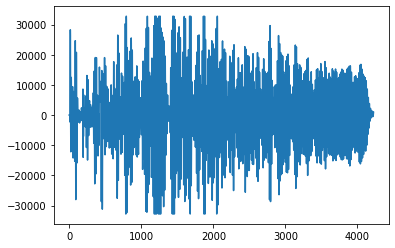

In [4]:
print(data.shape)
plt.plot(data[0,:,0])

### Kernel definition
KERNEL DESCRIPTION HERE  

The kernel has the following parameters:


In [3]:
cuda_source = open("doppler.cc").read()
doppler = cp.RawKernel(cuda_source, 'doppler')

### Data loading

First, download example data.

! wget -nc -nv LINK_TO_FILE_HERE -P ./data  

-----------------

DATA DESCRIPTION HERE 

### ELASTICITY estimation using the kernel

In [ ]:
CALCULATIONS HERE

### Presentation of results 

In [ ]:
RESULTS HERE

-----------------------------------------

## References

[Sarvazyan1998] Sarvazyan, A.P.; Rudenko, O.V.; Swanson, S.D.; Fowlkes, J.B.; Emalianov, S.Y. Shear Wave Elasticity Imaging: A New Ultrasonic Technology of Medical Diagnostics. Ultrasound Med. Biol. 1998, 24, 1419–1435.
